Project Planning Stage (Hong To Nhu Trinh)
- 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**1. Data Description**

**players.csv**
- Variable names: experience, hashedEmail, name, gender, played_hours, Age, subscribe
- Number of variables: 9
- Data type:
  - Character (chr): experience, hashedEmail, name, gender
  - Double (dbl): played_hours, Age
  - Logical (lgl): subscribe
- Type of variable:
  - Quantitative: played_hours, Age
  - Categorical: experience, gender, subscribe
- Mean (displayed in mean_table in part 3.Exploratory Data Analysis and Visualization): 
  - played_hours: 5.90 (h)
  - Age: 21.14 (years old)
- Number of observations: 196
- Number of observations containing NA: 2
- Data issue: the quantitative variables contain enormous data with different values. To make it easier to graph and investigate, the variables could be separated into groups of certain value (ex: Age into age group like (5-10), (10-15),...) 
- Potential issue: ...

**sessions.csv**
- Variable names: hashedEmail, start_time, end_time, original_start_time, original_end_time 
- Number of variables: 5
- Data type:
  - Character (chr): hashedEmail, start_time, end_time
  - Double (dbl): original_start_time, original_end_time 
- Number of observations: 1535
- Potential issues: 

**2. Questions**

**Question 1:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:** Can age predict if players subscribe or not in player.csv?

How the data will help you address the question of interest: 

Wrangle planning: 
  - Remove columns which is not used: hashed_email, name
  - Rename column Age to age, hashedEmail to hashed_email in order to make the columns' names in the same format.
  - Remove NA values in each column to tidy the data.
  - Convert categorical variables (subscribe, gender, experience) into factors

**3. Exploratory Data Analysis and Visualization**

- Load the data set into R

In [5]:
#code
player <- read_csv("/home/jovyan/work/Individual-Planning-Stage-Hong-To-Nhu-Trinh/players.csv")
player
session <- read_csv("/home/jovyan/work/Individual-Planning-Stage-Hong-To-Nhu-Trinh/sessions.csv")
session

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


- Wrangling and tidy data set:
  - Remove columns which is not used: hashed_email, name
  - Rename column Age to age, hashedEmail to hashed_email in order to make the columns' names in the same format.
  - Remove NA value in each column to tidy the data.
  - Convert categorical variables (subscribe, gender, experience) into factors
  - Scale and center numerical variables (age and played_hours)

In [8]:
 player_tidy <- player |>
    rename(
        hashed_email = hashedEmail,
        age = Age) |>
    select(-hashed_email, -name) |>
    mutate(
        experience = as.factor(experience),
        subscribe = as.factor(subscribe),
        gender = as.factor(gender)) |>
    mutate(scaled_played_hours = scale(played_hours, center = TRUE), 
        scaled_age = scale(age, center = TRUE))|>
     drop_na()
player_tidy

experience,subscribe,played_hours,gender,age,scaled_played_hours,scaled_age
<fct>,<fct>,<dbl>,<fct>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
Pro,TRUE,30.3,Male,9,0.86235447,-1.6427185
Veteran,TRUE,3.8,Male,17,-0.07214775,-0.5601286
Veteran,FALSE,0.0,Male,17,-0.20615184,-0.5601286
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,0.3,Male,22,-0.1955726,0.1164900
Amateur,FALSE,0.0,Prefer not to say,57,-0.2061518,4.8528206
Amateur,FALSE,2.3,Male,17,-0.1250441,-0.5601286


- Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.

In [16]:
mean_table <- player_tidy |>
  summarise(
    mean_age = round(mean(age, na.rm = TRUE),2),
    mean_played_hours = round(mean(played_hours, na.rm = TRUE),2))
mean_table

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.9


- Make a few exploratory visualizations of the data to help you understand it.

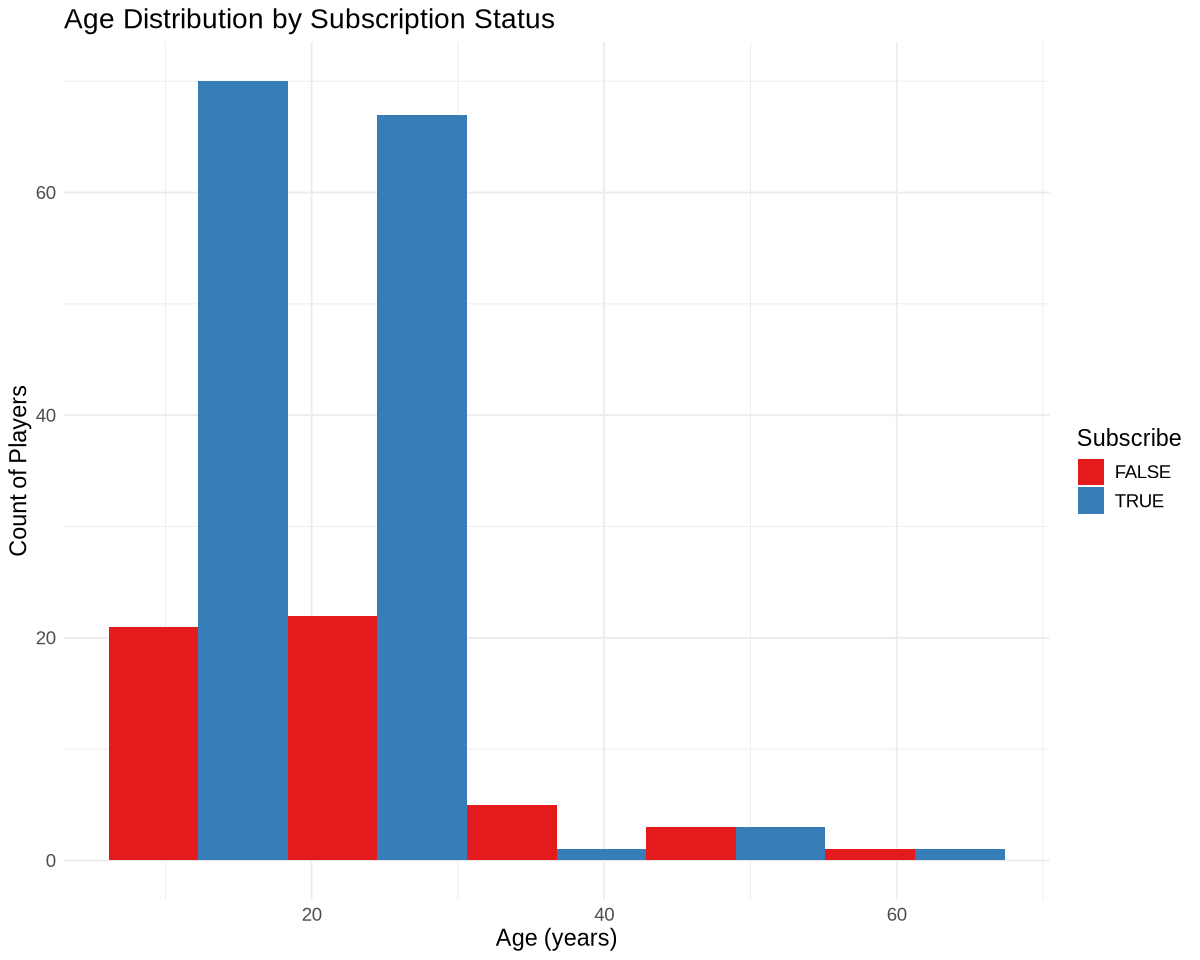

In [104]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(player_tidy, aes(x = age, fill = subscribe)) +
  geom_histogram(position = "dodge", bins = 5) +
  labs(title = "Age Distribution by Subscription Status",
       x = "Age (years)", y = "Count of Players", fill = "Subscribe") +
  theme_minimal() +theme(text = element_text(size=14)) + scale_fill_brewer(palette = 'Set1')

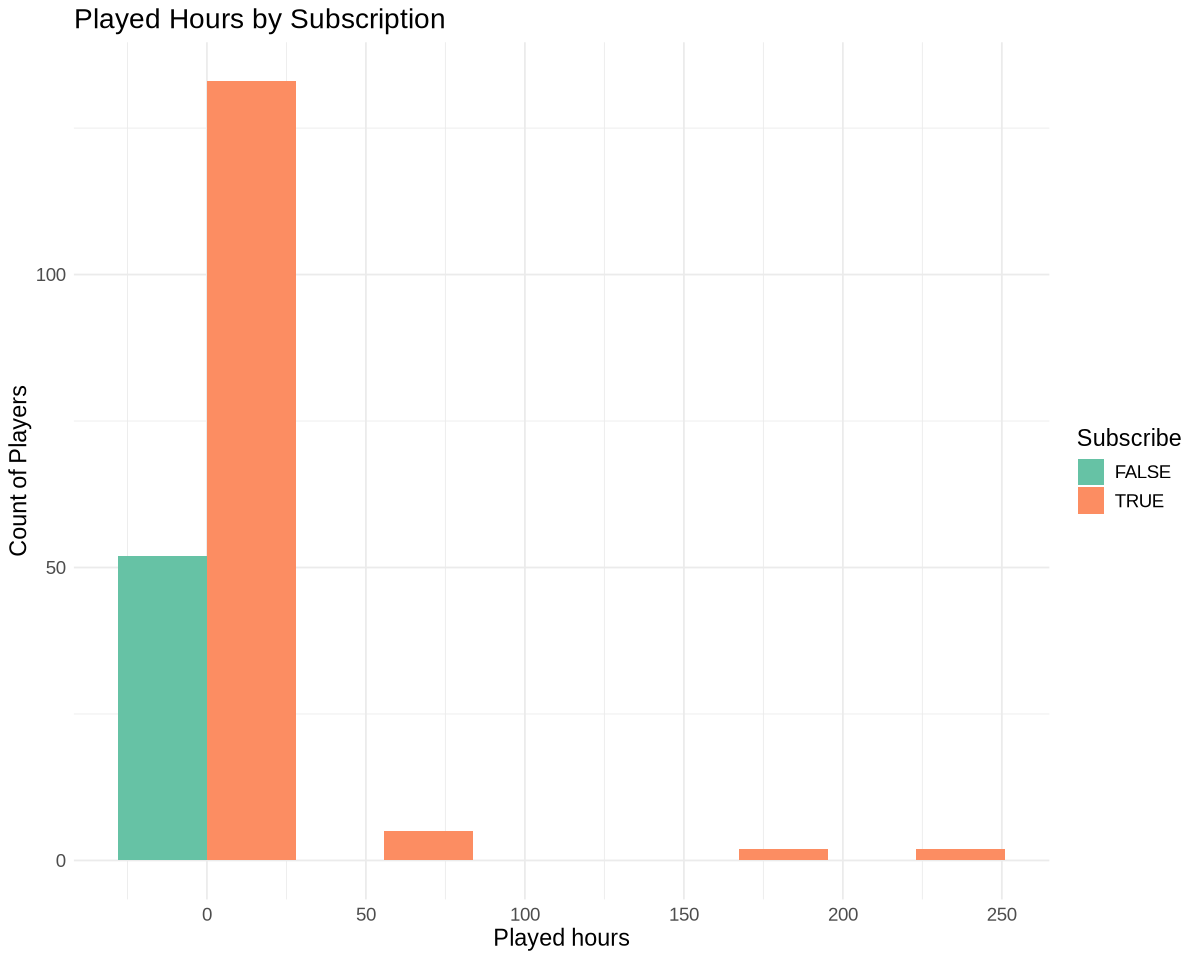

In [98]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(player_tidy, aes(x = played_hours, fill = subscribe)) +
geom_histogram(position = "dodge", bins=5) +
labs(title = "Played Hours by Subscription",
       x = "Played hours", y = "Count of Players", fill = "Subscribe") +
theme_minimal() + theme(text = element_text(size=14)) + scale_fill_brewer(palette = 'Set2')

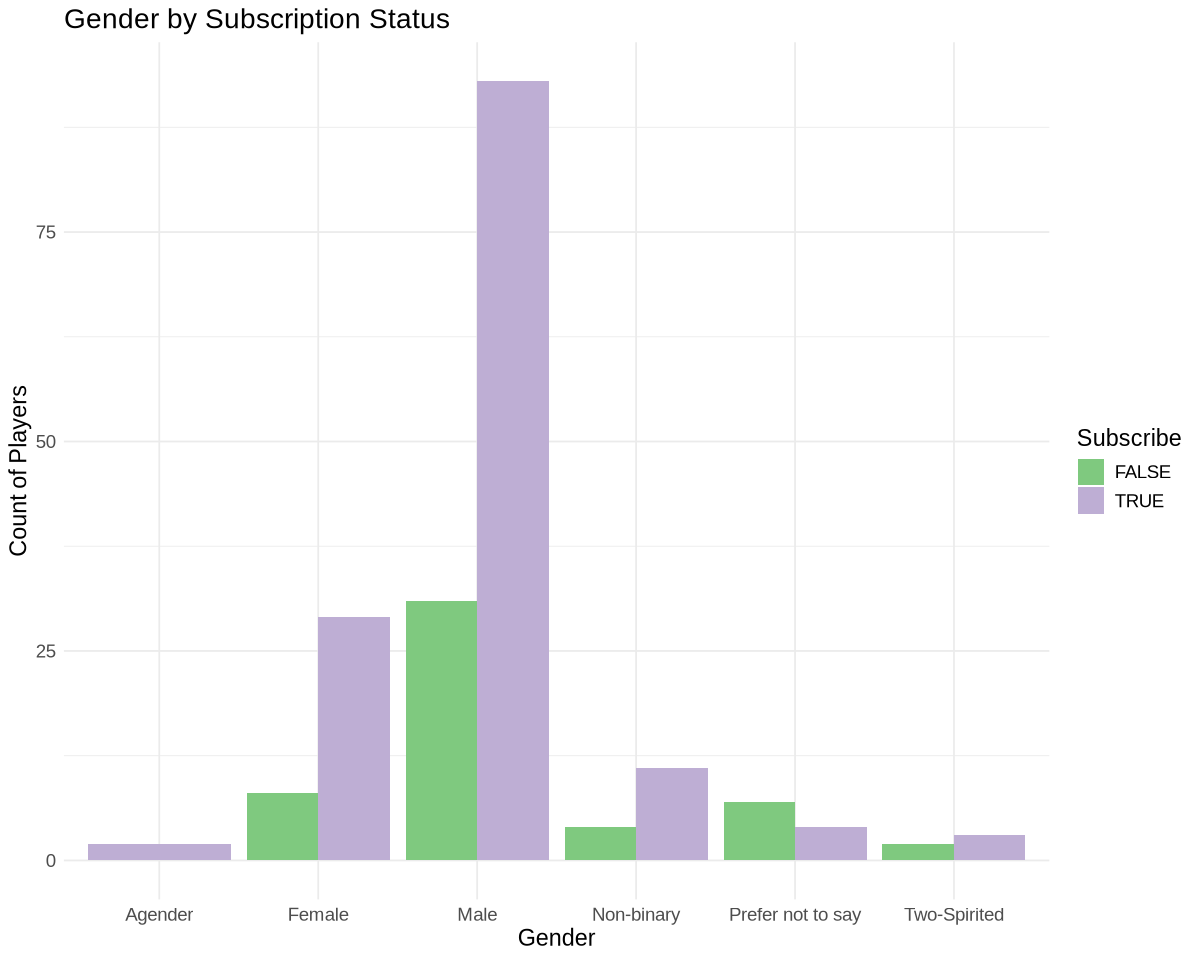

In [103]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(player_tidy, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Gender by Subscription Status",
       x = "Gender", y = "Count of Players", fill = "Subscribe") +
  theme_minimal() + theme(text = element_text(size=14)) + scale_fill_brewer(palette = 'Accent')

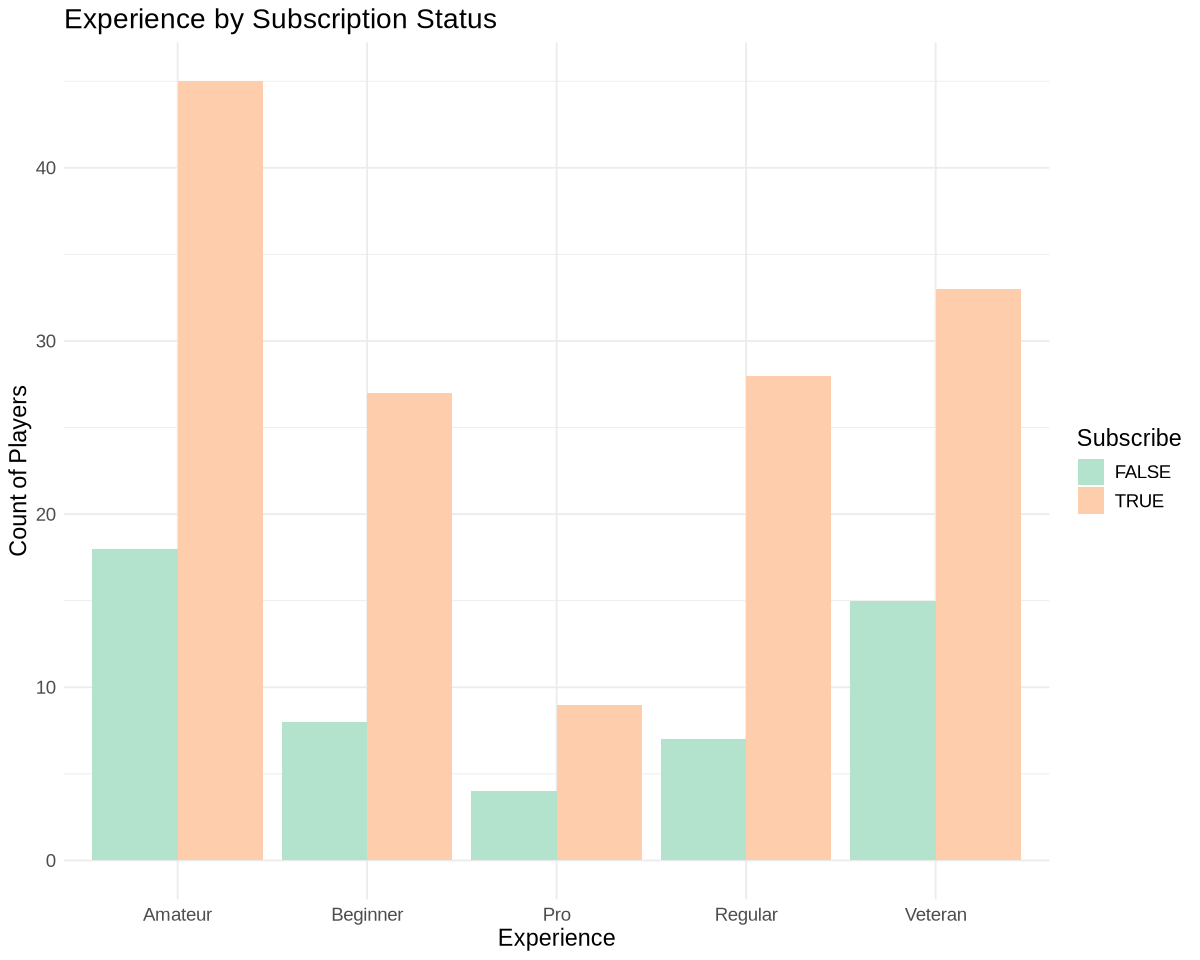

In [102]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(player_tidy, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Experience by Subscription Status",
       x = "Experience", y = "Count of Players", fill = "Subscribe") +
  theme_minimal() + theme(text = element_text(size=14)) + scale_fill_brewer(palette = 'Pastel2')

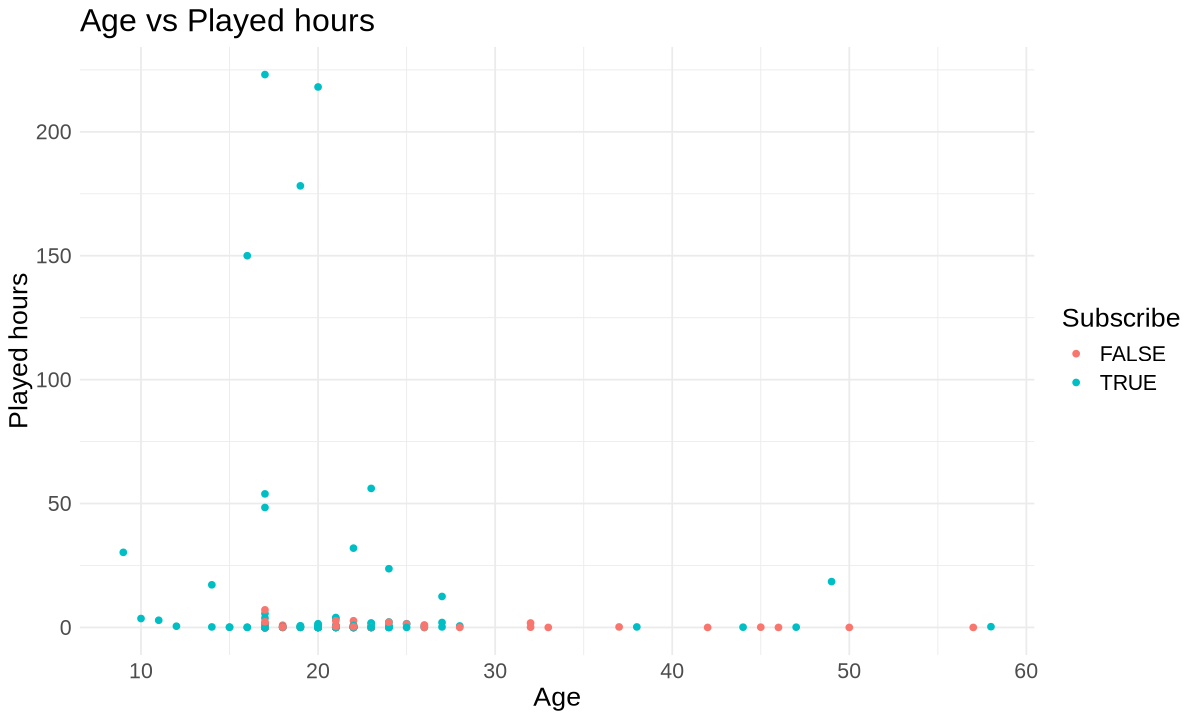

In [100]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(player_tidy, aes(x = age, y= played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Age vs Played hours ",
       x = "Age", y = "Played hours", color = "Subscribe") +
  theme_minimal() + theme(text = element_text(size=14))

**4. Methods and Plan**

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

-	To solve my specific question above, I chose the data set player.csv, which includes the data on age and subscription. To determine if we can use age to predict the subscription status, (plot a graph to see how subscriptions differ between different ages) ...
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- To solve the question of interest, I use both data sets player.csv and sessions.csv. With the players.csv file, players' characteristics can be determined using variables including gender, experience, age, and played hours. With sessions.csv, behaviors such as favorite play time could be indicated using the specific time provided and the number of plays of an account. 
- I suggest using KNN classification with the response variable being “subscribe”, and explanatory variables (predictors) being “experience”, “age”, “played hours”, and “gender”. The reason for this is that our response variable, “subscribe”, is classified as true or false, which is favorable for KNN classification because "subscribe" can be treated as categorical value.
Compared to regression models, which are usually used to predict numerical values, KNN classification could produce better prediction. 
- To see how these features (predictors) differ between different various type, I apply the same method to see how the prediction will be for the response variable and only each of  explanatory variable. From the result of error prediction, the explanatory with the lowest value is the most predictive variable. 


In [ ]:
player_center <- player_tidy|>
  mutate(
         scaled_height = scale(height, center = TRUE), 
         scaled_color_score = scale(color_score, center = TRUE))



**5.GitHub Repository**"

Git hub link: https://github.com/nancytrinh/Individual-Planning-Stage-Hong-To-Nhu-Trinh.git